In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn import datasets

## Linear regression for linear estimation function

### Generating Random Least Squares Regression dataset with 500 points

In [2]:
X, y =  datasets.make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1, bias=10, noise=25, 
                                 random_state=42, coef=False)
print('Shape of X is:', X.shape)
print('Shape of y is:', y.shape)

Shape of X is: (500, 1)
Shape of y is: (500,)


### Calculating $\beta_{LS} = (A^\top A)^{-1} A^\top y$ with $A^\dagger=(A^\top A)^{-1} A^\top$ known as the pseudo-inverse of $A$.

In [3]:
# Method 1
# Model Matrix
A = np.append(X,np.ones([len(X),1]),1)

# Calculating of A transpose A 
AtA = np.dot(A.T,A)

# Calculating A transpose y
Aty = np.dot(A.T,y)

# Calculating inverse of A transpose A
AtA_inv = np.linalg.inv(AtA)

beta = np.dot(AtA_inv,Aty)
print ("Beta from Normal Equation: ", beta)

Beta from Normal Equation:  [63.18605572  9.02058667]


In [4]:
# Method 2
beta1 = (np.linalg.pinv(A.dot(A.T)).dot(A)).T.dot(y)
print ("Beta from using np.linalg.pinv: ", beta1)

Beta from using np.linalg.pinv:  [63.18605572  9.02058667]


In [5]:
# Method 3
beta2 = (np.linalg.lstsq(A,y, rcond=-1))[0]
print ("Beta from using np.linalg.lstsq: ", beta2)

Beta from using np.linalg.lstsq:  [63.18605572  9.02058667]


### Calculating the regression line and plotting it with the original data

In [6]:
regression_line = beta[0]*X + beta[1]

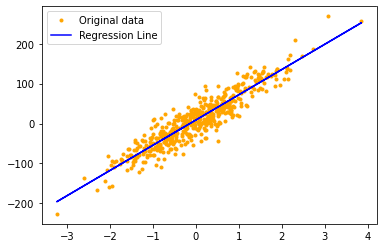

In [7]:
plt.plot(X, y, '.',c = 'orange',label='Original data')
plt.plot(X, regression_line, 'b-', label='Regression Line')
plt.legend()
plt.show()

## Linear regression for non-linear estimation function

### Generating a random exponential dataset

In [8]:
X = np.linspace(1, 10, 101)
y = 2*(X**(0.3)) + 0.3*np.random.random(len(X))
print('Shape of X is:', X.shape)
print('Shape of y is:', y.shape)

Shape of X is: (101,)
Shape of y is: (101,)


### Function `my_func_fit (X,y)`, where `X` and `y` are column vectors of the same size containing experimental data. The function returns the values for $\alpha$ and $\beta$ which are the scalar parameters of the estimation function $𝑦̂ (𝑥)=𝛼𝑥^𝛽$.

In [9]:
def my_func_fit (X,y):
    logX = np.log(X)
    logy = np.log(y)
    A = np.expand_dims(logX, axis = 1)
    A = np.append(A,np.ones([len(logX),1]),1)
    scalar_parameters = (np.linalg.lstsq(A,logy, rcond=-1))[0]
    return scalar_parameters[0], np.exp(scalar_parameters[1])

In [10]:
beta, alpha = my_func_fit(X, y)

In [11]:
regression_curve = alpha*np.power(X, beta)

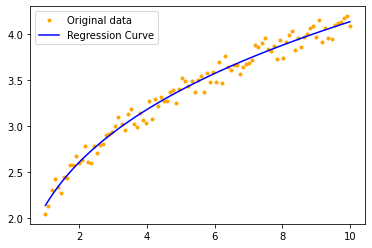

In [12]:
plt.plot(X, y, '.',c = 'orange',label='Original data')
plt.plot(X, regression_curve, 'b-', label='Regression Curve')
plt.legend()
plt.show()

## Generalizing the above work

### Function my_lin_regression(f, X, y), where f is a list containing function objects to basis functions that are pre-defined, and X and y are arrays containing noisy data. Assuming that X and y are the same size, i.e,  𝑋(𝑖)∈ℝ,𝑦(𝑖)∈ℝ . Returns an array beta which represent the coefficients of the solved problem. I.e. we are solving the  𝛽  which contains the coefficients in the regressor  𝑦̂ (𝑥)=𝛽1⋅𝑓1(𝑥)+𝛽2⋅𝑓2(𝑥)+⋯+𝛽𝑛⋅𝑓𝑛(𝑥)  with  𝑓𝑖  being basis functions.

In [13]:
def my_lin_regression(f, X, y):
    
    A = np.column_stack([f_i(X) for f_i in f])

    # Add bias column
    A = np.column_stack([A, np.ones(len(X))])

    beta = (np.linalg.lstsq(A,y, rcond=-1))[0]
    
    return beta

### Function `regression_plot(f,X,y,beta)` which plots a graph between `X` and `y`, and overlays it with the regression line.

In [14]:
def regression_plot(f,X,y,beta):
    
    A = np.column_stack([f_i(X) for f_i in f])
    
    # Add bias column
    A = np.column_stack([A, np.ones(len(X))])
    
    regression_curve = A.dot(beta) 
    
    plt.plot(X, y, '.',c = 'orange',label='Original data')
    plt.plot(X, regression_curve, 'b-', label='Regression Curve')
    
    plt.legend()
    plt.show()

 ### A few test scenarios are given to validate the code.

### Test-1

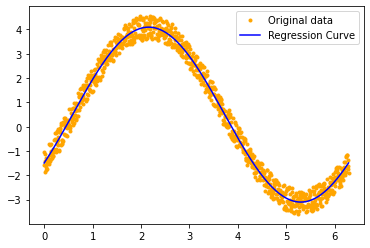

In [15]:
X = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(X) - 2*np.cos(X) + np.random.random(len(X))
f = [np.sin, np.cos] # f1 = sin, f2 = cos

beta = my_lin_regression(f, X, y)
regression_plot(f,X,y,beta)

### Test-2

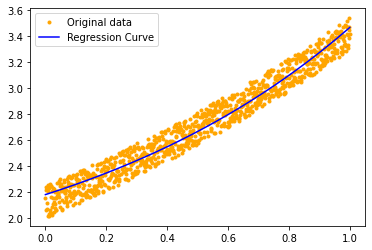

In [16]:
X = np.linspace(0, 1, 1000)
y = 2*np.exp(0.5*X) + 0.25*np.random.random(len(X))
f = [np.exp] # f1 = exp

beta = my_lin_regression(f, X, y)
regression_plot(f,X,y,beta)